In [29]:
AUDIO_DIR = "/Users/zainhazzouri/projects/Bachelor_Thesis/Data/Kaggle/"
SAMPLE_RATE = 22050 # sample rate of the audio file
bit_depth = 16 # bit depth of the audio file
hop_length = 512
n_mfcc = 20 # number of MFCCs features
n_fft=1024, # window size
n_mels = 256 # number of mel bands to generate
win_length = None # window length



In [30]:
import IPython.display as ipd
import random
import librosa.display
import numpy as np
import librosa
import torch
import torchaudio
import glob
from torch.utils.data import Dataset
import matplotlib.pyplot as plt



In [37]:
import glob
import random
import torch
import torchaudio
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd


class AudioProcessor:
    def __init__(self, audio_dir, n_mfcc=20):
        """Initialize the AudioProcessor class with the audio directory and number of MFCCs."""
        self.audio_dir = audio_dir
        self.n_mfcc = n_mfcc
        self.device = self.get_device()
        self.music_waves = []
        self.speech_waves = []
        self.mix_waves = []
        self.silence_waves = []
        self.load_audio_files()

    def load_audio_files(self):
        """Load audio files from the audio directory."""
        self.music_waves = glob.glob(self.audio_dir + "music_wav" + "/*.wav")
        self.speech_waves = glob.glob(self.audio_dir + "speech_wav" + "/*.wav")
        self.mix_waves = glob.glob(self.audio_dir + "Mix_wav" + "/*.wav")
        self.silence_waves = glob.glob(self.audio_dir + "silence_wav" + "/*.wav")

    def get_device(self):
        """Determine the appropriate device to use for computation."""
        if torch.cuda.is_available():
            return "cuda"
        elif torch.backends.mps.is_built():
            return "mps"
        else:
            return "cpu"


    def MFCC_Converter(self, filepath):
        """Convert an audio file into MFCC features."""
        waveform, sample_rate = torchaudio.load(filepath)
        mfcc = torchaudio.transforms.MFCC(sample_rate=sample_rate, n_mfcc=self.n_mfcc)(waveform).to(self.device)
        return mfcc

    def get_mfccs_values(self, audio_files_path):
        """Get MFCC features for a list of audio files."""
        mfccs_values = []
        for file_path in audio_files_path:
            mfccs_value = self.MFCC_Converter(file_path)
            mfccs_values.append(mfccs_value)
        return mfccs_values

    def play_audio_samples(self):
        """Play random sample audio files."""
        music_sample = random.choice(self.music_waves)
        speech_sample = random.choice(self.speech_waves)
        mix_sample = random.choice(self.mix_waves)
        silence_sample = random.choice(self.silence_waves)

        print("Music sample:")
        ipd.display(ipd.Audio(music_sample))

        print("Speech sample:")
        ipd.display(ipd.Audio(speech_sample))

        print("Mix sample:")
        ipd.display(ipd.Audio(mix_sample))

        print("Silence sample:")
        ipd.display(ipd.Audio(silence_sample))

    def librosa_spectrogram(self, filepath):
        """Calculate the spectrogram using librosa."""
        y, sr = librosa.load(filepath)
        S = librosa.feature.melspectrogram(y, sr=sr, n_mels=self.n_mfcc)
        log_S = librosa.power_to_db(S, ref=np.max)
        return log_S, sr

    def plot_audio_spectrograms(self, music_mfccs_values, speech_mfccs_values, mix_mfccs_values, silence_mfccs_values):
        """Plot spectrograms for sample audio files."""
        audio_mfccs_values = [music_mfccs_values[0], speech_mfccs_values[0], mix_mfccs_values[0], silence_mfccs_values[0]]
        audio_files = [random.choice(self.music_waves), random.choice(self.speech_waves),
                       random.choice(self.mix_waves), random.choice(self.silence_waves)]
        audio_titles = ["Music", "Speech", "Mix", "Silence"]

        fig, axs = plt.subplots(4, 2, figsize=(12, 16))

        for i, (mfcc_value, audio_file, audio_title) in enumerate(zip(audio_mfccs_values, audio_files, audio_titles)):
            # Get librosa spectrogram
            log_S, sr = self.librosa_spectrogram(audio_file)

            # Torchaudio MFCCs
            axs[i, 0].set_title(f"Torchaudio {audio_title} MFCCs")
            img0 = axs[i, 0].imshow(mfcc_value.squeeze().cpu().numpy().T, origin='lower', aspect='auto')
            fig.colorbar(img0, ax=axs[i, 0])
            # Librosa MFCCs
            axs[i, 1].set_title(f"Librosa {audio_title} MFCCs")
            img1 = librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', ax=axs[i, 1])
            fig.colorbar(img1, ax=axs[i, 1], format='%+2.0f dB')

        # Adjust layout
        plt.tight_layout()
        plt.show()


    def process_and_visualize(self):
        """Process audio files and visualize their spectrograms."""
        music_mfccs_values = self.get_mfccs_values(self.music_waves)
        speech_mfccs_values = self.get_mfccs_values(self.speech_waves)
        mix_mfccs_values = self.get_mfccs_values(self.mix_waves)
        silence_mfccs_values = self.get_mfccs_values(self.silence_waves)
        self.play_audio_samples()
        self.plot_audio_spectrograms(music_mfccs_values, speech_mfccs_values, mix_mfccs_values, silence_mfccs_values)




Music sample:


Speech sample:


Mix sample:


Silence sample:


<ipython-input-37-31caf9c811a5>:77: FutureWarning: Pass y=[-0.04415894 -0.13433838 -0.10302734 ... -0.13217163 -0.065979
  0.03393555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=self.n_mfcc)
<ipython-input-37-31caf9c811a5>:77: FutureWarning: Pass y=[ 0.6746216   0.72146606  0.7060547  ... -0.193573   -0.1564331
 -0.10958862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=self.n_mfcc)
<ipython-input-37-31caf9c811a5>:77: FutureWarning: Pass y=[0.02151489 0.04370117 0.03613281 ... 0.05871582 0.09359741 0.09933472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=self.n_mfcc)
<ipython-input-37-31caf9c811a5>:77: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From ver

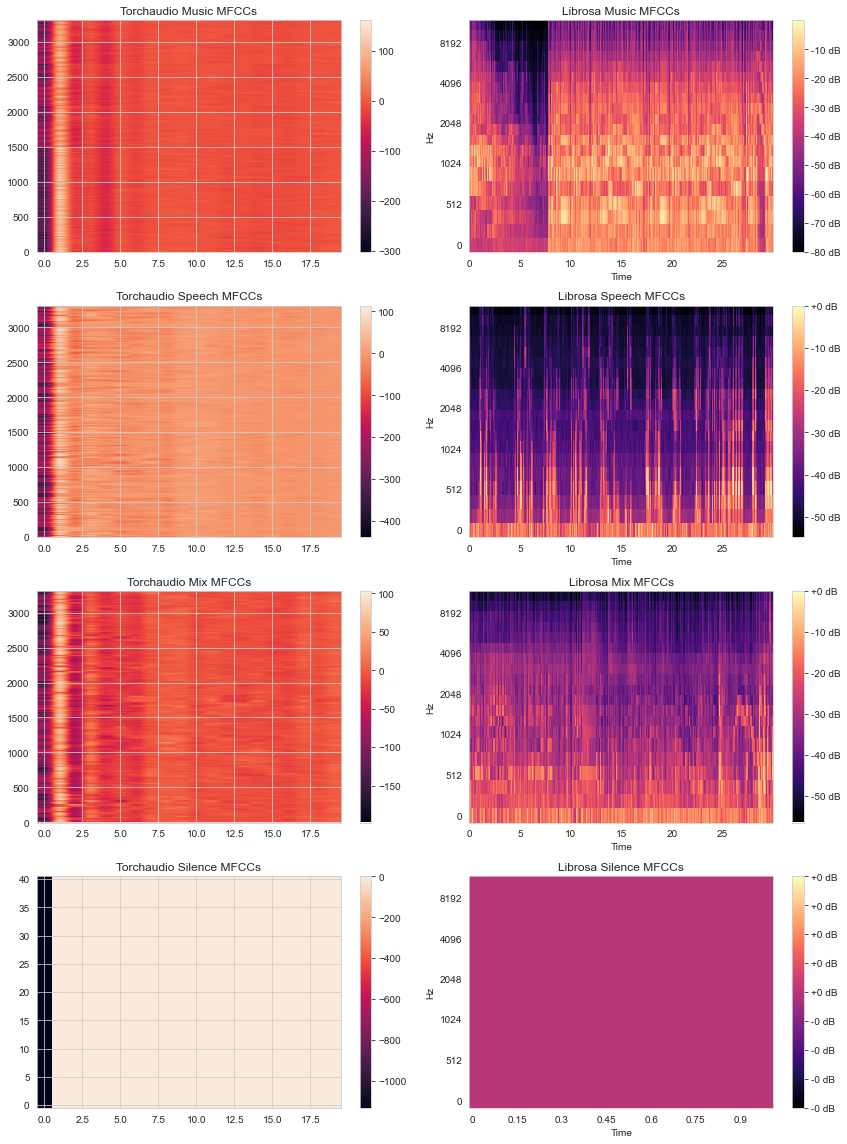

In [39]:
if __name__ == '__main__':
    AUDIO_DIR = "/Users/zainhazzouri/projects/Bachelor_Thesis/Data/Kaggle/"
    audio_processor = AudioProcessor(AUDIO_DIR)
    audio_processor.process_and_visualize()